In [2]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings(action='ignore')
%matplotlib inline

In [3]:
from keras.utils.np_utils import to_categorical
import tensorflow as tf
import gc
gc.enable()

In [4]:
dataset = pd.read_csv('user_a.csv', delimiter=',')

In [5]:
dataset_users = [pd.read_csv('user_'+user+'.csv', delimiter=',') for user in ['a','b','c','d']]

In [6]:
dataset.head()

,Class,AF3 delta std,AF3 delta m,AF3 theta std,AF3 theta m,AF3 alpha std,AF3 alpha m,AF3 beta std,AF3 beta m,F7 delta std,...,F8 beta std,F8 beta m,AF4 delta std,AF4 delta m,AF4 theta std,AF4 theta m,AF4 alpha std,AF4 alpha m,AF4 beta std,AF4 beta m
0,1.0,3569.164550,2063.892754,1.673726,4.444736,0.526209,3.002088,1.425022,3.302739,3563.803888,...,45.468326,72.508750,3701.186330,2182.676835,18.192418,41.349662,16.004756,42.046467,46.280843,73.565719
1,1.0,3568.423670,2063.099248,1.897790,3.728823,1.304186,1.854353,1.366575,2.546458,3563.560922,...,36.551948,66.931186,3725.210509,2180.197439,8.820788,38.012788,19.601233,29.431054,38.559351,67.470041
2,1.0,3568.157929,2062.445859,2.798014,2.574504,1.120537,1.958819,0.982433,2.258622,3563.279981,...,40.754308,66.816547,3724.417296,2176.823208,18.159202,23.612639,14.378291,19.555084,43.210004,67.781924
3,1.0,3567.710021,2062.112673,2.181775,3.610507,0.629608,2.155876,0.856275,2.233711,3562.787801,...,38.074628,63.915386,3725.822160,2177.089059,19.737616,29.484396,15.793034,25.713513,39.250246,65.031031
4,1.0,3565.546124,2063.128867,1.685161,3.384311,0.677526,1.795798,0.927924,1.909810,3562.655091,...,35.357384,64.534645,3723.053978,2167.798335,8.429414,26.374975,14.920736,35.675266,33.901687,66.956313


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2880 entries, 0 to 2879
Columns: 113 entries, Class to AF4 beta m
dtypes: float64(113)
memory usage: 2.5 MB


In [8]:
dataset.describe()

,Class,AF3 delta std,AF3 delta m,AF3 theta std,AF3 theta m,AF3 alpha std,AF3 alpha m,AF3 beta std,AF3 beta m,F7 delta std,...,F8 beta std,F8 beta m,AF4 delta std,AF4 delta m,AF4 theta std,AF4 theta m,AF4 alpha std,AF4 alpha m,AF4 beta std,AF4 beta m
count,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,...,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000
mean,1.000000,3572.735546,2065.177641,1.037918,2.477254,0.949795,2.310609,2.224140,3.311305,3566.919323,...,30.670347,33.031491,3607.576448,2107.007956,6.684569,17.003011,7.309571,18.548518,36.497788,39.097939
std,0.816638,2.196760,1.529244,0.496783,0.963555,0.435073,0.771319,0.569616,0.394712,1.842509,...,13.911802,12.894324,42.043787,33.849007,5.398308,14.129471,5.677376,12.036952,15.384302,14.104989
min,0.000000,3552.889260,2059.383202,0.030171,0.601632,0.075538,0.733693,0.767053,1.579466,3558.922185,...,10.635560,12.217942,2705.784083,2012.737139,0.243917,1.728774,0.181284,1.706448,13.237884,13.770469
25%,0.000000,3571.634491,2064.340743,0.684039,1.969405,0.647807,1.824173,1.814392,3.049707,3565.692360,...,21.675162,24.196401,3589.969446,2089.184096,3.245111,9.810866,3.536545,10.390539,26.111939,29.174488
50%,1.000000,3572.869922,2065.112789,0.986066,2.377674,0.902000,2.237968,2.160555,3.294564,3566.926684,...,27.454260,31.812941,3606.044566,2101.898881,5.586462,14.802745,5.956592,16.307022,33.202806,38.071163
75%,2.000000,3574.116075,2065.897237,1.301700,2.846428,1.206119,2.686252,2.593016,3.543390,3568.155890,...,33.537011,38.654785,3626.847369,2118.036649,8.675381,20.736578,9.474619,23.675337,40.566181,46.526094
max,2.000000,3579.662192,2086.609218,4.748079,15.603812,4.990970,11.002262,4.229407,5.688087,3572.462431,...,84.119120,89.132433,3758.046521,3005.693915,95.606765,244.145529,94.448386,138.908194,88.024693,94.350650


In [9]:
target='class' #target variable (dependent)

In [10]:
col = dataset.columns       # .columns gives columns names in data
features = col[1:]         #contain all the column names from the dataset except first
print(features)              # will print the features

Index(['AF3 delta std', 'AF3 delta m', 'AF3 theta std', 'AF3 theta m',
       'AF3 alpha std', 'AF3 alpha m', 'AF3 beta std', 'AF3 beta m',
       'F7 delta std', 'F7 delta m',
       ...
       'F8 beta std', 'F8 beta m', 'AF4 delta std', 'AF4 delta m',
       'AF4 theta std', 'AF4 theta m', 'AF4 alpha std', 'AF4 alpha m',
       'AF4 beta std', 'AF4 beta m'],
      dtype='object', length=112)


In [11]:
list_cor = pd.DataFrame(dataset[features].corr().unstack().abs().sort_values().drop_duplicates())
list_cor.columns = ['correlation_index']
list_corr_high = list(list_cor[-33:-1]['correlation_index'].index)
list_corr_high

[('P7 theta m', 'AF4 theta m'),
 ('F8 alpha m', 'FC6 alpha m'),
 ('F3 beta std', 'F8 beta std'),
 ('FC6 theta m', 'F8 theta m'),
 ('AF4 beta m', 'F8 beta m'),
 ('AF4 alpha m', 'FC6 alpha m'),
 ('FC6 beta m', 'F8 beta m'),
 ('P7 beta m', 'F3 beta m'),
 ('P7 theta m', 'F3 theta m'),
 ('F3 alpha m', 'FC6 alpha m'),
 ('F3 alpha m', 'AF4 alpha m'),
 ('FC6 theta m', 'P7 theta m'),
 ('P7 theta m', 'F8 theta m'),
 ('T8 beta std', 'P7 beta std'),
 ('F3 theta m', 'FC6 theta m'),
 ('AF4 beta std', 'F8 beta std'),
 ('FC6 beta std', 'F8 beta std'),
 ('F8 beta m', 'T8 beta m'),
 ('F3 beta std', 'P7 beta std'),
 ('FC6 beta m', 'P7 beta m'),
 ('FC6 beta m', 'F3 beta m'),
 ('AF4 beta m', 'P7 beta m'),
 ('FC6 beta m', 'AF4 beta m'),
 ('F8 beta std', 'T8 beta std'),
 ('F8 beta m', 'P7 beta m'),
 ('F3 beta std', 'FC6 beta std'),
 ('FC6 beta std', 'AF4 beta std'),
 ('P7 beta std', 'FC6 beta std'),
 ('F3 beta m', 'AF4 beta m'),
 ('P7 beta std', 'AF4 beta std'),
 ('P7 beta std', 'F8 beta std'),
 ('AF4 beta s

In [12]:
#calculates the total number and percentage of missing values for each feature

total = dataset[features].isnull().sum().sort_values(ascending = False)
percent = (dataset[features].isnull().sum()/dataset[features].isnull().count()*100).sort_values(ascending = False)
missing  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing

,Total,Percent
AF3 delta std,0,0.0
AF3 delta m,0,0.0
FC6 theta std,0,0.0
FC6 delta m,0,0.0
FC6 delta std,0,0.0
...,...,...
T7 delta m,0,0.0
T7 delta std,0,0.0
FC5 beta m,0,0.0
FC5 beta std,0,0.0


In [35]:
def preprocess_inputs(df, features, target):        
    
    list_cor = pd.DataFrame(df[features].corr().unstack().abs().sort_values().drop_duplicates())
    list_cor.columns = ['correlation_index']
    list_corr_high = list(list_cor[-33:-1]['correlation_index'].index)
    list_corr_high
    
    #alculate the absolute difference between the two elements of each high correlation pair 
    for eletrods in list_corr_high:
        df['__'.join(list(eletrods))] = df.apply(lambda row: abs(row[eletrods[0]] - row[eletrods[1]]), axis=1)
    
    col = df.columns       # .columns gives columns names in data
    features = col[1:]
    
    y = df.drop(features, axis=1) #target variable
    y = to_categorical(y)
    X = df[features]
     # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=123)
    
    # Scale X with a standard scaler
    transformer = StandardScaler() 

    X_train_transformer = transformer.fit_transform(X_train)
    X_test_transformer = transformer.transform(X_test)

    return X_train_transformer, X_test_transformer, y_train, y_test

In [47]:
#deep learning model using keras
def build_model(X):  
    k2 = int(X.shape[1]**(1/2))
    inputs = tf.keras.Input(shape=(X.shape[1],))
    expand_dims = tf.reshape(inputs, (-1,k2, k2), name=None)
    lstm = tf.keras.layers.LSTM(32, return_sequences=True)(expand_dims)
    drop = tf.keras.layers.Dropout(.4)(lstm)
    lstm = tf.keras.layers.LSTM(16, return_sequences=True)(expand_dims)
    drop = tf.keras.layers.Dropout(.4)(lstm)
    flatten = tf.keras.layers.Flatten()(lstm) # convert to 1D vector
    outputs = tf.keras.layers.Dense(3, activation='softmax')(flatten)    
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    


    
     return model

#The resulting model architecture consists of two LSTM layers followed by dropout layers, a flatten layer, 
#and a dense layer with softmax activation for multiclass classification.

In [48]:
#training evaluation
def train_model(dataset, features, target, build_model=build_model):
    X_train, X_test, y_train, y_test = preprocess_inputs(dataset, features, target)

    class_model = build_model(X_train)

    history = class_model.fit(
        X_train,
        y_train,
        validation_split=0.3,
        batch_size=32,
        epochs=30,
        verbose=0,
        callbacks=[
            tf.keras.callbacks.EarlyStopping(
                monitor='val_loss',
                patience=3,
                restore_best_weights=True
            )
        ]
    )
    print("Accuracy: %.2f%% (+/- %.2f%%)" % (np.mean(history.history['accuracy'])*100, np.std(history.history['accuracy'])*100)) 

    class_acc = class_model.evaluate(X_test, y_test, verbose=0)[1]
    print("Test Accuracy (Class Model): {:.2f}%".format(class_acc * 100))
    
    y_pred = np.array(list(map(lambda x: np.argmax(x), class_model.predict(X_test))))
    clr = classification_report(y_test.argmax(axis=-1) , y_pred)
    print("Classification Report:\n----------------------\n", clr)
    
    return history

In [29]:
def plot_accuracy_history(history):
    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [30]:
def plot_loss_history(history):
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

Accuracy: 69.58% (+/- 10.15%)
Test Accuracy (Class Model): 66.71%
28/28 [==============================] - 1s 5ms/step
Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.67      0.75      0.71       275
           1       0.67      0.60      0.63       287
           2       0.67      0.65      0.66       303

    accuracy                           0.67       865
   macro avg       0.67      0.67      0.67       865
weighted avg       0.67      0.67      0.67       865



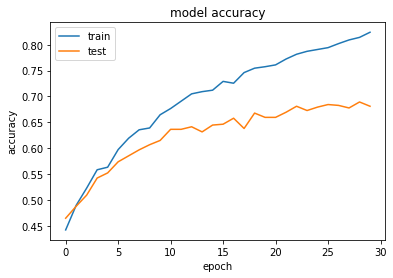

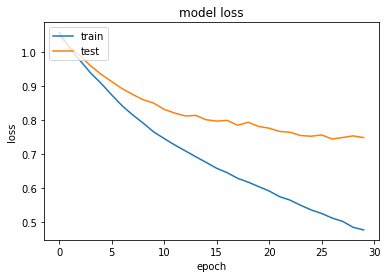

Accuracy: 70.91% (+/- 13.18%)
Test Accuracy (Class Model): 72.02%
28/28 [==============================] - 1s 4ms/step
Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.73      0.76      0.75       275
           1       0.70      0.71      0.70       303
           2       0.73      0.69      0.71       287

    accuracy                           0.72       865
   macro avg       0.72      0.72      0.72       865
weighted avg       0.72      0.72      0.72       865



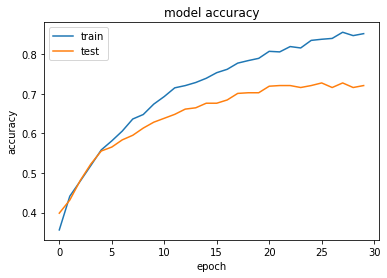

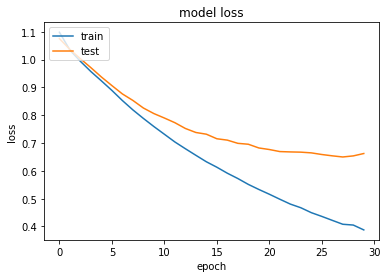

Accuracy: 58.08% (+/- 8.58%)
Test Accuracy (Class Model): 54.10%
28/28 [==============================] - 1s 5ms/step
Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.56      0.64      0.60       275
           1       0.55      0.54      0.54       287
           2       0.51      0.46      0.48       303

    accuracy                           0.54       865
   macro avg       0.54      0.54      0.54       865
weighted avg       0.54      0.54      0.54       865



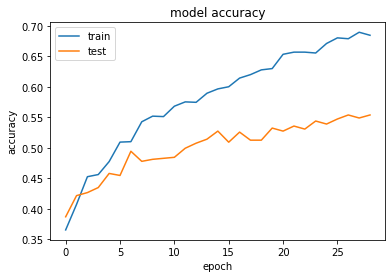

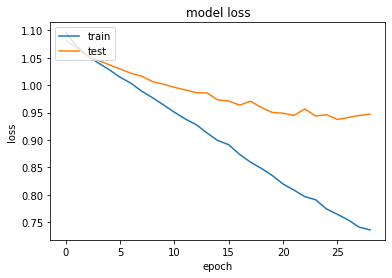

Accuracy: 58.82% (+/- 9.06%)
Test Accuracy (Class Model): 57.69%
28/28 [==============================] - 1s 5ms/step
Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.60      0.60      0.60       275
           1       0.53      0.62      0.57       287
           2       0.61      0.51      0.56       303

    accuracy                           0.58       865
   macro avg       0.58      0.58      0.58       865
weighted avg       0.58      0.58      0.58       865



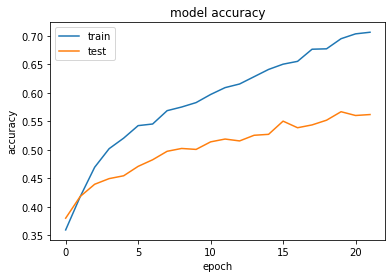

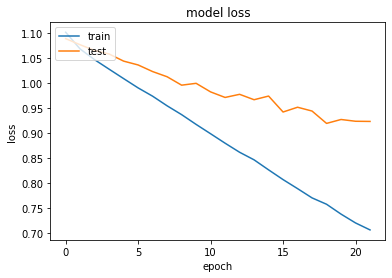

In [31]:
# iterates over each dataset
for dfs in dataset_users:
    history = train_model(dfs, features, target)
    plot_accuracy_history(history)
    plot_loss_history(history)